In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("bioAI.mplstyle")

In [2]:
def f(x, y, alpha):
    return np.stack((x, -alpha*x*y + y), axis = -1)

def f_inv(xf, yf, alpha):
    return np.stack((xf, yf/(1-alpha*xf)),axis=-1)

def metric(x, y, alpha):
    g11 = 1 + alpha**2*y**2
    g12 = alpha**2*x*y - alpha*y
    g21 = g12
    g22 = (1 - alpha*x)**2
    return g11, g12, g22

def jacobian_determinant(x, y, alpha):
    g11, g12, g22 = metric(x, y, alpha)
    return np.sqrt(g11*g22 - g12**2)

In [3]:
y_size = 2
x_size = 1.544*y_size

alpha = 2/3*1/x_size

walls = np.array([[0, -y_size/2], [x_size, -y_size/2], [x_size, y_size/2], [0, y_size/2], [0, -y_size/2]])
transformed_walls = f(walls[:,0], walls[:,1], alpha)

(-0.1544, 3.2424, -1.1, 1.1)

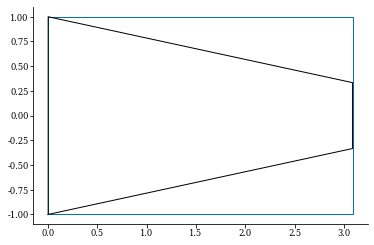

In [4]:
plt.plot(walls[:,0], walls[:,1])
plt.plot(transformed_walls[:,0], transformed_walls[:,1], "-k")
plt.axis("equal")

In [5]:
nx = 64
ny = int(nx*y_size/x_size)
x = np.linspace(0, x_size, nx)
y = np.linspace(-y_size/2, y_size/2, ny)
xx, yy = np.meshgrid(x, y)
r = np.stack([xx.ravel(), yy.ravel()], axis = -1)

In [6]:
g11, g12, g22 = metric(r[:,0], r[:,1], alpha)
det_g = jacobian_determinant(r[:,0], r[:,1], alpha)

g11 = g11.reshape(ny,nx)
g12 = g12.reshape(ny,nx)
g22 = g22.reshape(ny,nx)
det_g = det_g.reshape(ny,nx)

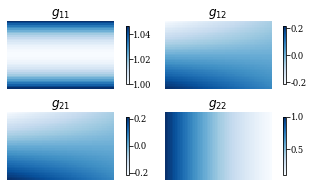

In [24]:
fig, ax = plt.subplots(2,2, figsize = (5,5))
components = [g11, g12, g12, g22]
vmax = np.amax(components)
vmin = np.amin(components)

labels = ["$g_{11}$","$g_{12}$", "$g_{21}$","$g_{22}$"]

for i in range(len(components)):
    row = i // 2
    col = i % 2
    ax[row, col].set_title(labels[i])
    im = ax[row, col].imshow(components[i], origin = "lower")#, vmax = vmax, vmin = vmin)
    fig.colorbar(im, ax = ax[row, col], pad = 0.1, fraction = 0.024)
    ax[row, col].axis("off")
    
plt.subplots_adjust(wspace = 0.3, hspace = -0.5)
plt.savefig("soccer_figs/metric_components.svg", bbox_inches = "tight")

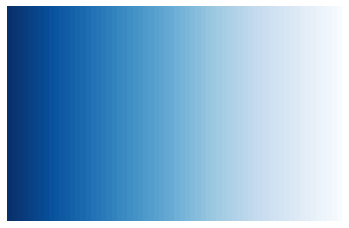

In [8]:
plt.imshow(det_g, origin = "lower")
plt.axis("off")

plt.savefig("soccer_figs/det_g.svg")

In [9]:
r_f = f(r[:,0], r[:,1], alpha)

In [10]:
rg = np.linspace(0.5,1,nx)
rb = np.linspace(0.5,1, ny)
rrg, rrb = np.meshgrid(rg, rb)
col_grid = np.stack((rrg.ravel(), rrb.ravel()), axis = -1)

r_red = np.zeros(nx*ny)[:,None]
alpha = rrg.ravel()
rgb = np.concatenate((r_red, col_grid),axis= -1)
rgba = np.concatenate((rgb, alpha[:,None]), axis = -1)

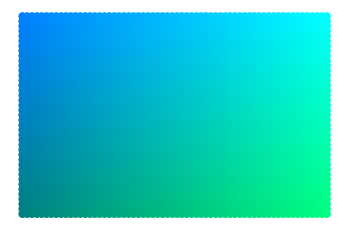

In [11]:
plt.scatter(*r.T, c = rgb, s = 50)
plt.axis("off")
plt.savefig("soccer_figs/sample.svg")

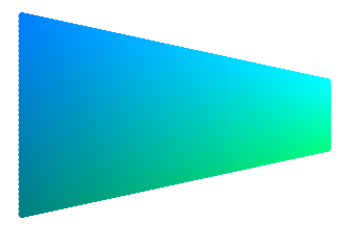

In [12]:
plt.scatter(*r_f.T, c = rgb, s = 50)
plt.axis("off")
plt.savefig("soccer_figs/tapered_sample.svg")